# 1. T-test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

###  One-sample T-test with Python

The test will tell us whether means of the sample and the population are different <br/>
###### H0 - The null hypothesis is that the two groups come from the same population


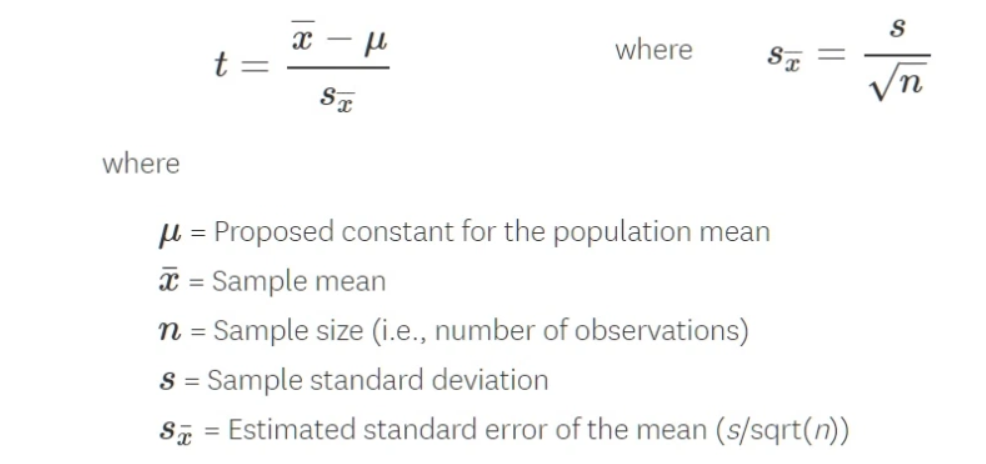


In [21]:
# Assume population is :
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70, 
      18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70,18,43,23,21,20,19,70, 
      18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70,20,35,50,28,40,55,18,
      16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70,18,16,55,30,25,43,18,30,
      43,23,21,20,19,70,18,43,23,21,20,19,70,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,
      43,23,21,20,19,70,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,28,14,24,16,17,32,35,2]
print("Ages length - ",len(ages))

import numpy as np
ages_pop_mean=np.mean(ages)
print("Mean - ",ages_pop_mean)

Ages length -  191
Mean -  29.774869109947645


In [24]:
## Lets take sample

sample_size=30
age_sample=np.random.choice(ages,sample_size)
age_sample, np.mean(age_sample)

(array([26, 43, 43, 26, 30, 14, 70, 18, 43, 43, 40, 25, 20, 28, 21, 30, 70,
        18, 14, 43, 43, 19, 32, 27, 28, 18, 21, 21, 43, 43]),
 32.0)

In [26]:
from scipy.stats import ttest_1samp
import pandas as pd
import scipy.stats as stats
import math

In [23]:
# Below popmean is an assumed mean of the population age
ttest, p_value = ttest_1samp(a=age_sample, popmean=ages_pop_mean)

print('p_value - ',p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p_value -  0.8869831745883378
we are accepting null hypothesis


### Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

###### H0 - The null hypothesis for this test is that the groups have equal means

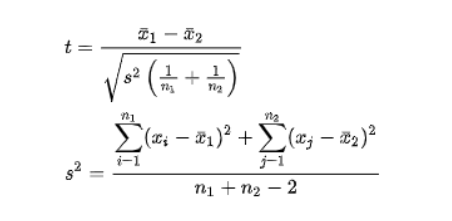

In [57]:
np.random.seed(12)
classA_ages=stats.poisson.rvs(mu=30,size=60)
ClassB_ages=stats.poisson.rvs(mu=34,size=60)
(classA_ages, classA_ages.mean()), (ClassB_ages, ClassB_ages.mean())

((array([23, 26, 38, 43, 26, 41, 31, 35, 35, 23, 27, 29, 26, 33, 28, 29, 29,
         29, 21, 32, 27, 18, 29, 31, 22, 32, 30, 38, 32, 30, 20, 32, 41, 32,
         27, 43, 33, 28, 32, 27, 24, 28, 38, 29, 30, 35, 24, 35, 23, 26, 33,
         28, 24, 21, 39, 27, 30, 28, 32, 23]),
  29.75),
 (array([36, 31, 36, 38, 29, 36, 32, 38, 44, 33, 39, 36, 34, 34, 27, 38, 25,
         34, 29, 35, 37, 32, 31, 37, 29, 39, 36, 35, 40, 43, 26, 24, 32, 25,
         34, 34, 32, 40, 36, 31, 32, 29, 38, 31, 19, 27, 29, 31, 37, 33, 36,
         42, 32, 33, 38, 41, 23, 29, 27, 35]),
  33.31666666666667))

In [58]:
_, p_value=stats.ttest_ind(a=classA_ages, b=ClassB_ages, equal_var=False)
print('p_value - ',p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p_value -  0.00047450633221443123
 we are rejecting null hypothesis


### Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [75]:
weight1 = [25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2 = weight1+stats.norm.rvs(scale=5, loc=-1.25, size=len(weight1))
print((weight1,np.mean(weight1)), (weight2,np.mean(weight2)))
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                         "weight_change":np.array(weight2)-np.array(weight1)})
weight_df

([25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45], 30.466666666666665) (array([25.3294254 , 27.66315922, 30.20736856, 26.79771765, 26.64538148,
       26.83070721, 24.39672368, 30.96028259, 27.89133561, 33.53190609,
       26.59733928, 27.29651039, 31.36562425, 29.95983465, 45.44505184]), 29.39455786023934)


,weight_10,weight_20,weight_change
0,25,25.329425,0.329425
1,30,27.663159,-2.336841
2,28,30.207369,2.207369
3,35,26.797718,-8.202282
4,28,26.645381,-1.354619
5,34,26.830707,-7.169293
6,26,24.396724,-1.603276
7,29,30.960283,1.960283
8,30,27.891336,-2.108664
9,26,33.531906,7.531906


In [76]:
_, p_value=stats.ttest_rel(a=weight1, b=weight2)
print('p_value - ',p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p_value -  0.2970267860129859
we are accepting null hypothesis


# 2. Chi-Square test
The fundamental of the chi-square test (χ2), a statistical method to make the inference about the distribution of a variable or to decide whether there is a relationship exists between two variables of a population. The inference relies on the χ2 distribution curve, dependent upon the number of degrees of freedom d.f.

The χ2 distribution curve is right-skewed and as the number of degrees of freedom becomes larger, the χ2 curve will more similar to the normal distribution.

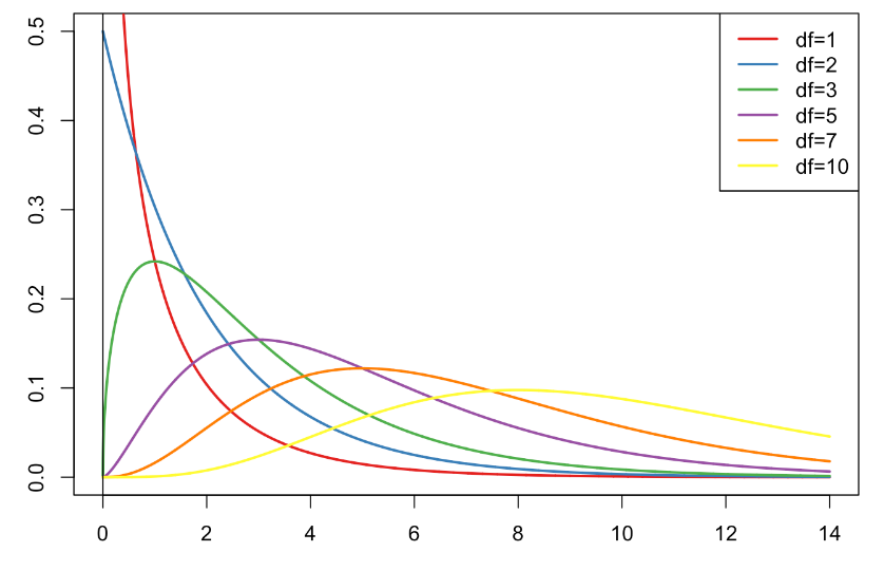

## 2.a χ2 test of Independence

It is used to decide whether there is a relationship exists between two variables of a population. Useful when analyzing survey results of 2 categorical variables.

###### H₀: The two categorical variables have no relationship

The number of degrees of freedom of the χ2 independence test statistics:

**d.f. = (# rows -1) *(#columns-1)**

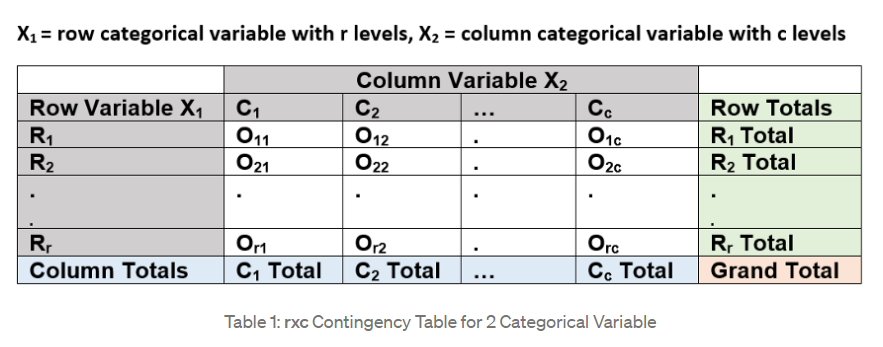

If H₀ is true, each cell of the value in the contingency table above will contain a theoretical or expected frequency Eᵢⱼ, as opposed to the observed value Oᵢⱼ for each cell.

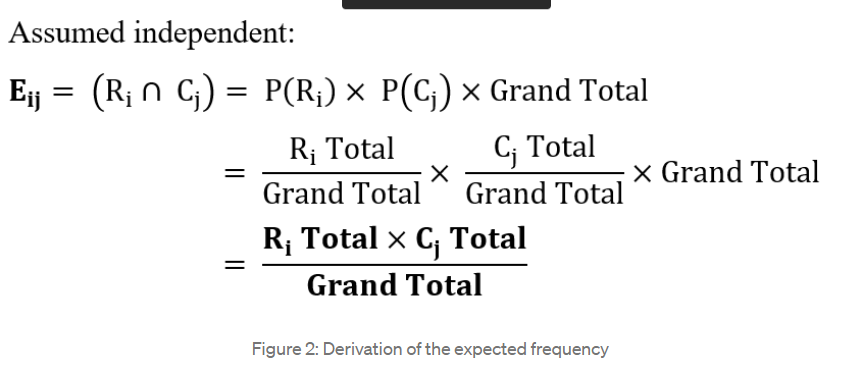

**The test statistic:** Comparing the differences between Oᵢⱼ & Eᵢⱼ leads to the χ2 statistic, with [(r-1) x (c-1)] degrees of freedom, where

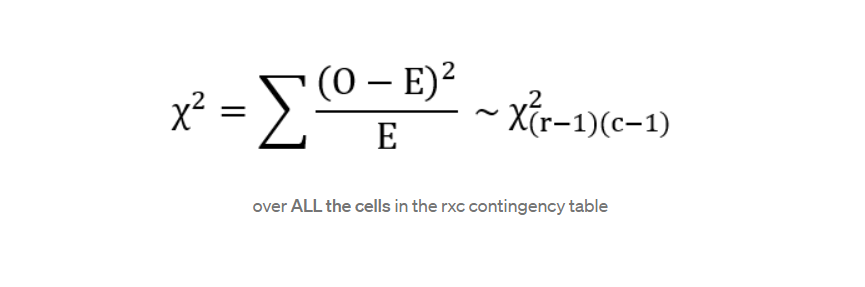

#### Example 

_The table below is an exit poll which displays the joint responses to 2 categorical variables: people in categories from consider from 18–29, 30–44, 45–64 and >65 years, and their political affiliation, which is “Conservative”, “Socialist” and “Other”. Is there any evidence of a relationship between the age group and their political affiliation, at 5% significant level?_

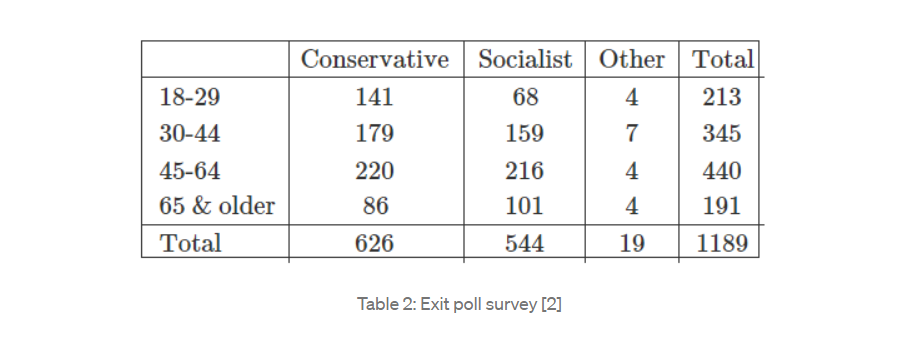

According to five steps process of hypothesis testing:

**H₀: whether age group and their political affiliation are independent, i.e. no relationship**

Significance Level **α = 0.05**

Following χ2 independence test statistics:

In [79]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]
df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation']) 
df

,Age Group,Political Affiliation
0,18-29,Conservative
1,18-29,Conservative
2,18-29,Conservative
3,18-29,Conservative
4,18-29,Conservative
...,...,...
1184,65 & older,Socialist
1185,65 & older,Other
1186,65 & older,Other
1187,65 & older,Other


In [81]:
# create contingency table
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'],
                           margins=True, margins_name="Total")
data_crosstab

Political Affiliation,Conservative,Other,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-65,220,4,216,440
65 & older,86,4,101,191
Total,626,19,544,1189


In [82]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0

rows = df['Age Group'].unique()
columns = df['Political Affiliation'].unique()

for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 24.367421717305202  and p value is: 0.0004469083391495099
Null Hypothesis is rejected.


In [87]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1.693614940576721  and critical value is: 12.591587243743977
Failed to reject the null hypothesis.


**Conclusion:** We have enough evidence that there is an association between age group and their political affiliation, at 5% significance level.

## 2.b: χ2 Goodness-Of-Fit Test

It is used to make the inference about the distribution of a variable.

##### H₀: The variable has the specified distribution, normal

The number of degrees of freedom of the χ2 Goodness-Of-Fit test statistics:<br/>
**d.f. = (# categories -1)**

It compares the observed frequencies O of a sample with the expected frequencies E.<br/>
**E = probability of the event * total sample size**

#### Example 

_The table below displays the more than 44 million people voting result for 2013 German Federal Election. 41.5% of German vote for the Christian Democratic Union (CDU), 25.7% for the Social Democratic Party (SPD) and the remaining 32.8% as Others._

_Assume the researcher take a random sample and pick 123 students of FU Berlin about their party affiliation. Out of them 57 vote for CDU, 26 vote for SPD and 40 for Others. These number corresponds to the observed frequencies._

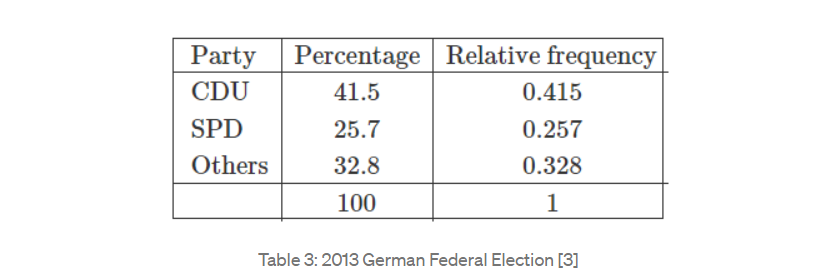

According to five steps process of hypothesis testing:<br/>
**H₀: The variable has the specified distribution, i.e. the observed and expected frequencies are roughly equal**

Following χ2 Goodness-Of-Fit test statistics:

In [85]:
# Creation of data
data = [['CDU', 0.415, 57], ['SPD', 0.257, 26], ['Others', 0.328, 40]] 
df = pd.DataFrame(data, columns = ['Varname', 'prob_dist', 'observed_freq']) 
df['expected_freq'] = df['observed_freq'].sum() * df['prob_dist']
df

,Varname,prob_dist,observed_freq,expected_freq
0,CDU,0.415,57,51.045
1,SPD,0.257,26,31.611
2,Others,0.328,40,40.344


In [86]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
for i in range(len(df)):
    O = df.loc[i, 'observed_freq']
    E = df.loc[i, 'expected_freq']
    chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, df['Varname'].nunique() - 1)
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1.693614940576721  and p value is: 0.42878164729702506
Failed to reject the null hypothesis.


In [88]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, df['Varname'].nunique() - 1)
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1.693614940576721  and critical value is: 5.991464547107979
Failed to reject the null hypothesis.


**Conclusion:** We do not have enough evidence that the observed and expected frequencies are not equal, at 5% significance level.

# 3. ANOVA test

**Analysis of variance (ANOVA)** is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. The ANOVA table represents between- and within-group sources of variation, and their associated degree of freedoms, the sum of squares (SS), and mean squares (MS). The total variation is the sum of between- and within-group variances. The F value is a ratio of between- and within-group mean squares (MS). p value is estimated from F value and degree of freedoms.

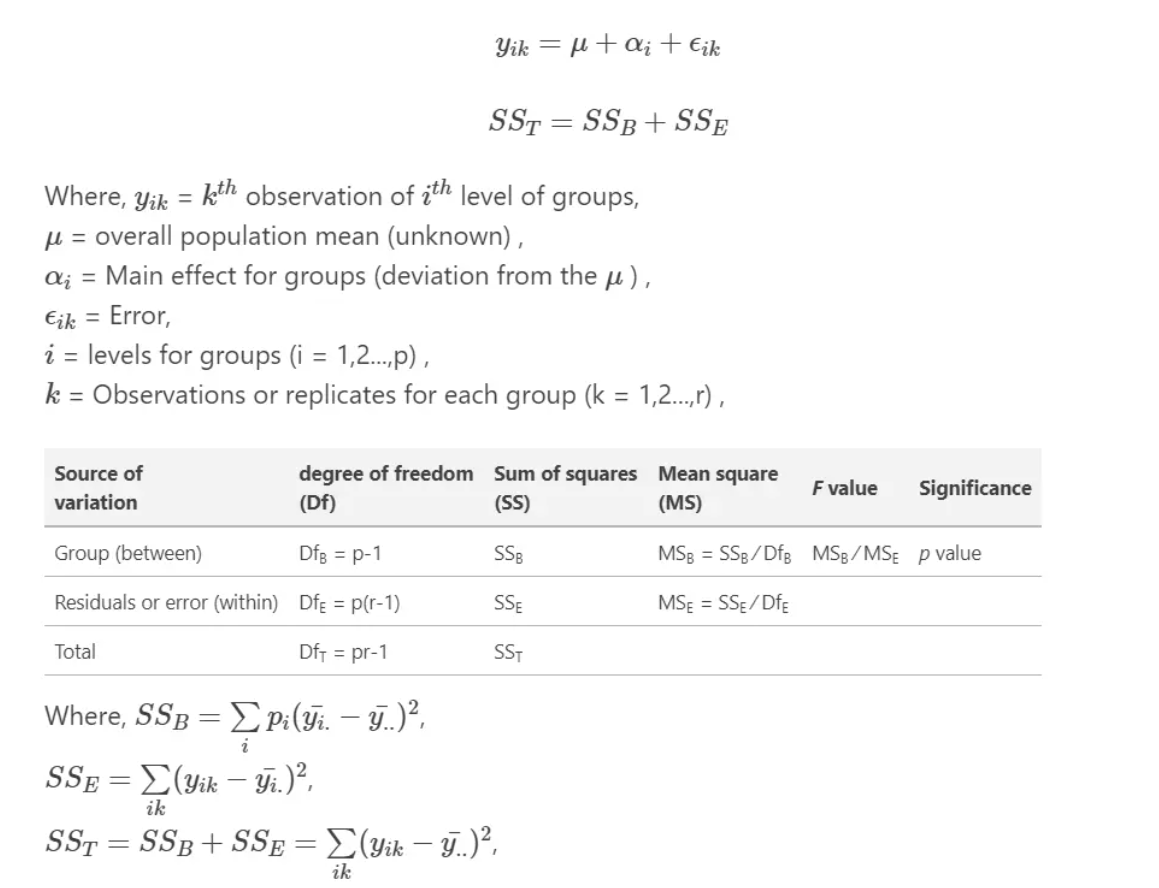

**Assumptions of ANOVA**
1) All populations involved follow a normal distribution <br>
2) All populations have the same variance <br>
3) The samples are randomly selected and independent of one another <br>

## 3a. One-way ANOVA

**Example 1**

Consider the monthly income of members from three different gyms - fitness centers given below:

**Gym 1 (n = 22):** [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73] <br>
**Gym 2 (n = 18):** [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]<br>
**Gym 3 (n = 23):** [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]<br>
Using ANOVA, test whether the mean monthly income is equal for each Gym.

**H₀ - Mean of all three gym member income is equal**

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])

print('Count, Mean and standard deviation of monthly income of members of Gym 1:\n Length:%3d, Mean:%3.2f , and Std:%3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2:\n Length:%3d, Mean:%3.2f , and Std:%3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3:\n Length:%3d, Mean:%3.2f , and Std:%3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

Count, Mean and standard deviation of monthly income of members of Gym 1:
 Length: 22, Mean:62.55 , and Std:8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:
 Length: 18, Mean:63.28 , and Std:7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:
 Length: 23, Mean:60.83 , and Std:8.00


In [98]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3) 
monthly_inc_df

,Gym,Monthly_inc
0,1,60
1,1,66
2,1,65
3,1,55
4,1,62
...,...,...
18,3,58
19,3,68
20,3,70
21,3,72


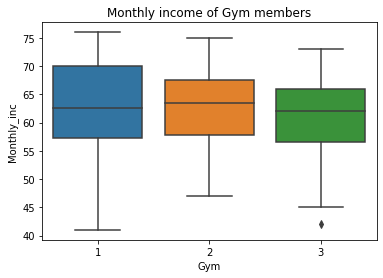

In [99]:
# A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

**Identify the test statistic:** Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

**Calculate F, a test statistic:** <br/>_scipy.stats.f.ppf_ gives the critical value at a given level of confidence with a pair of degrees of freedom.<br/>
_scipy.stats.f.cdf_ gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom.

In [104]:
alpha = 0.05

import scipy.stats as stats

# Approach 1  (using P-value)
f_value, p_value = stats.f_oneway(monthly_inc_df[monthly_inc_df.Gym=='1']['Monthly_inc'], 
                                monthly_inc_df[monthly_inc_df.Gym=='2']['Monthly_inc'], 
                                monthly_inc_df[monthly_inc_df.Gym=='2']['Monthly_inc'])
print(fvalue, pvalue)

conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("F-value is:", f_value, " and P-value is:", p_value)
print(conclusion)

0.055285961871750444 0.9462670434390922
F-value is: 0.055285961871750444  and P-value is: 0.9462670434390922
Failed to reject the null hypothesis.


**Conclusion:** We have enough evidence that can state that income of all gym varies a like, at 5% significance level.

## 3b. Two-way ANOVA

A two-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two factors.<br/>
The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

In [105]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
df

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


water: p-value = .000527 <br/>
sun: p-value = .0000002 <br/>
water*sun: p-value = .120667 <br/>

**Conclusion :** <br>
- Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.<br>
- Since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between sunlight exposure and watering frequency.

# 4. A/B test